In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import scipy
from sklearn.linear_model import LogisticRegression, LinearRegression
import itertools
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.base import clone

## Parte 1

In [2]:
grad = pd.read_csv('grad.csv')
grad

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [3]:
grad.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


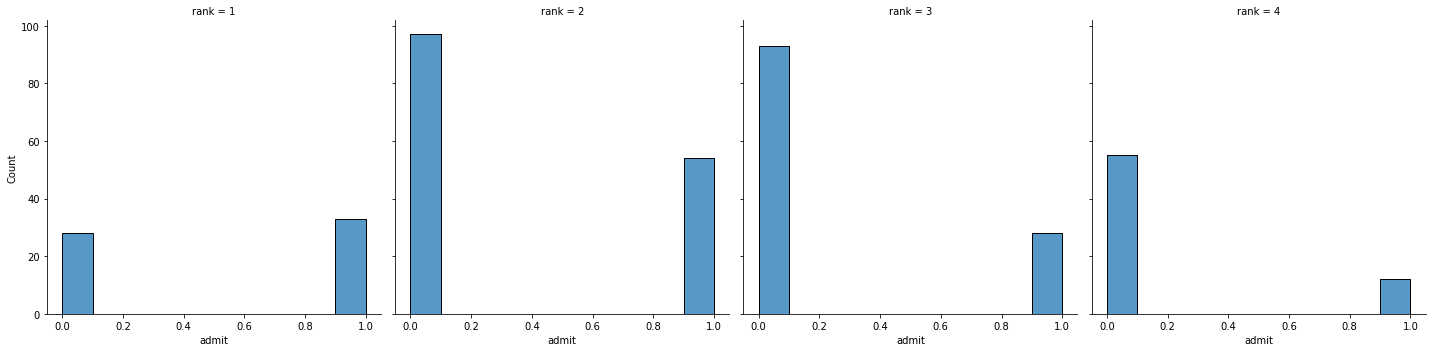

In [4]:
sns.displot(
    grad, x="admit", col="rank"
);
#Rank 1 school have better admit rate

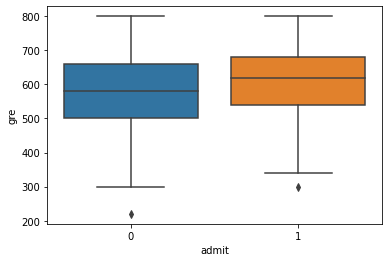

In [5]:
sns.boxplot(x="admit", y="gre",
            data=grad);
# People that got admitted had higher GRE scores

## Parte 2

In [7]:
X = grad[['gre','gpa','rank']]
y = grad['admit']
X,y

(     gre   gpa  rank
 0    380  3.61     3
 1    660  3.67     3
 2    800  4.00     1
 3    640  3.19     4
 4    520  2.93     4
 ..   ...   ...   ...
 395  620  4.00     2
 396  560  3.04     3
 397  460  2.63     2
 398  700  3.65     2
 399  600  3.89     3
 
 [400 rows x 3 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 395    0
 396    0
 397    0
 398    0
 399    0
 Name: admit, Length: 400, dtype: int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [9]:
def cv(X_kf, y_kf, base_estimator, n_folds, random_seed=154):
    kf = KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
    accuracy, precision, recall = np.empty(n_folds), np.empty(n_folds), np.empty(n_folds)
    cv_metrics_test = pd.DataFrame(np.empty(shape=(n_folds, 3)),
                                        columns=['Accuracy','Precision','Recall'])
    for idx, (train, test) in enumerate(kf.split(X_kf)):
        X_tr = X_kf.iloc[train]
        y_tr = y_kf.iloc[train]
        X_te = X_kf.iloc[test]
        y_te = y_kf.iloc[test]
        
        #scalar = StandardScaler()
        #scalar.fit(X_tr)
        #X_tr = scalar.transform(X_tr)
        #X_te = scalar.transform(X_te)
        
        estimator = clone(base_estimator)
        model = estimator
        model.fit(X_tr,y_tr)

        y_hat_test = model.predict(X_te)
        #y_hat_train = model.predict(X_tr)
        
        accuracy[idx] = metrics.accuracy_score(y_te, y_hat_test)
        precision[idx] = metrics.precision_score(y_te, y_hat_test)
        recall[idx] = metrics.recall_score(y_te, y_hat_test)
        
    cv_metrics_test['Accuracy'] = accuracy
    cv_metrics_test['Precision'] = precision
    cv_metrics_test['Recall'] = recall
    return cv_metrics_test

In [10]:
cv(X_train,y_train,LogisticRegression(max_iter=1000),5)

,Accuracy,Precision,Recall
0,0.666667,0.833333,0.208333
1,0.683333,0.333333,0.187500
2,0.766667,0.666667,0.444444
3,0.650000,0.500000,0.142857
4,0.700000,0.500000,0.166667


In [11]:
grad.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [12]:
rank = pd.get_dummies(grad['rank'])
new_grad = pd.concat([grad, rank], axis=1)
new_grad = new_grad.drop('rank', axis=1)
new_grad = new_grad.drop(4, axis=1)
new_grad.head()

,admit,gre,gpa,1,2,3
0,0,380,3.61,0,0,1
1,1,660,3.67,0,0,1
2,1,800,4.00,1,0,0
3,1,640,3.19,0,0,0
4,0,520,2.93,0,0,0


In [13]:
X_new = new_grad[['gre','gpa',1,2,3]]
y_new = new_grad['admit']
X_new,y_new

(     gre   gpa  1  2  3
 0    380  3.61  0  0  1
 1    660  3.67  0  0  1
 2    800  4.00  1  0  0
 3    640  3.19  0  0  0
 4    520  2.93  0  0  0
 ..   ...   ... .. .. ..
 395  620  4.00  0  1  0
 396  560  3.04  0  0  1
 397  460  2.63  0  1  0
 398  700  3.65  0  1  0
 399  600  3.89  0  0  1
 
 [400 rows x 5 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 395    0
 396    0
 397    0
 398    0
 399    0
 Name: admit, Length: 400, dtype: int64)

In [14]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_new,y_new)

In [15]:
cv(X_train_bin,y_train_bin,LogisticRegression(max_iter=1000),5).mean()

Accuracy     0.690000
Precision    0.592063
Recall       0.201618
dtype: float64

In [16]:
cv(X_train,y_train,LogisticRegression(max_iter=1000),5).mean()

Accuracy     0.693333
Precision    0.566667
Recall       0.229960
dtype: float64

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
model.predict_proba(X_test)[:,1]

array([0.21844528, 0.4015218 , 0.41826485, 0.46337761, 0.16006356,
       0.13782147, 0.4261604 , 0.36581127, 0.19759769, 0.12648465,
       0.38817005, 0.38896138, 0.27949988, 0.72698202, 0.26683912,
       0.42162056, 0.15488149, 0.16316792, 0.07113959, 0.30067053,
       0.43566073, 0.47287299, 0.23310595, 0.55450065, 0.4151572 ,
       0.2770468 , 0.357002  , 0.15246374, 0.21487601, 0.40510918,
       0.15592774, 0.24190335, 0.35191315, 0.10588588, 0.17120304,
       0.44039393, 0.40217708, 0.54072834, 0.20684574, 0.40129182,
       0.24959552, 0.48414796, 0.09294491, 0.35476925, 0.2667143 ,
       0.26558054, 0.39370133, 0.31714838, 0.25692841, 0.33084294,
       0.44122321, 0.35176763, 0.41596614, 0.09317782, 0.20896226,
       0.33606966, 0.22143493, 0.38832161, 0.28786122, 0.41374847,
       0.4753015 , 0.15892442, 0.13634286, 0.36957375, 0.31071043,
       0.32754373, 0.54565785, 0.09930841, 0.11323113, 0.33504997,
       0.21472022, 0.15794667, 0.36136203, 0.41448731, 0.16015

In [19]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

In [20]:
metrics.auc(fpr, tpr)

0.639047619047619

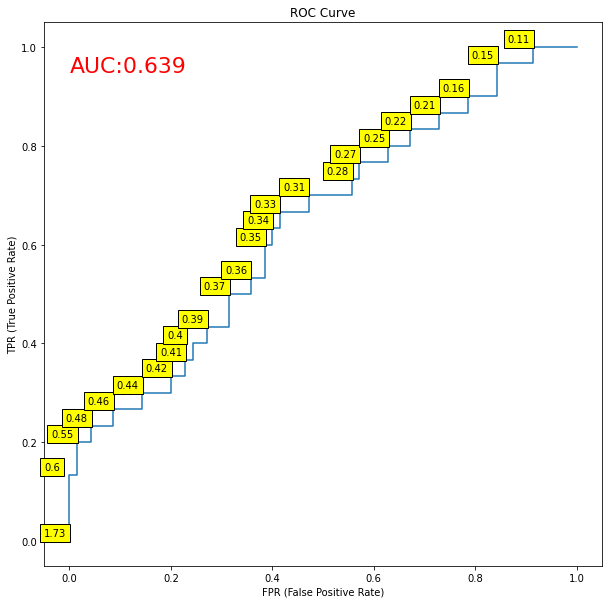

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(fpr,tpr)
ax.text(0,0.95,f'AUC:{round(metrics.auc(fpr, tpr),3)}',fontsize=22, color='red')
ax.set_xlabel('FPR (False Positive Rate)')
ax.set_ylabel('TPR (True Positive Rate)')
ax.set_title('ROC Curve')
for i,(x,y,th) in enumerate(zip(fpr,tpr,thresholds)):
    if (i%2 == 0):
        ax.text(x-0.05,y+0.01,round(th,2),bbox={'facecolor':'yellow'})  

In [22]:
for i,(f,t,th) in enumerate(zip(fpr,tpr,thresholds)):
    if (f<0.4) and (t>=0.6):
        print('yes: ',th)

yes:  0.3489951152619649


## Parte 3

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from src.roc_curve import roc_curve
#from roc_curve import roc_curve

ModuleNotFoundError: No module named 'src'

In [26]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:

y_pred=lr.predict_proba(X_test)[:, 1]

In [29]:
from sklearn.metrics import accuracy_score,r2_score,f1_score,roc_auc_score,roc_curve,mean_squared_error,precision_score,recall_score,accuracy_score,make_scorer

In [30]:
y_pred

array([6.96260204e-02, 9.90065015e-01, 2.45521183e-03, 1.24414655e-01,
       1.54769433e-02, 3.36976966e-02, 1.51890326e-02, 9.26481504e-01,
       1.04163518e-02, 8.99247625e-01, 7.83979278e-03, 9.74279164e-01,
       5.78385612e-01, 9.91087791e-01, 2.05313004e-01, 9.73900778e-01,
       6.25493646e-02, 9.93977561e-01, 8.03854157e-01, 9.83155138e-01,
       3.63350252e-02, 4.79022811e-02, 3.30408132e-01, 3.02603753e-02,
       9.71603252e-01, 1.34800907e-03, 4.11955406e-02, 8.09214633e-01,
       9.85912997e-01, 3.50423444e-02, 9.63180037e-01, 8.93579923e-01,
       8.86327121e-01, 2.39333097e-02, 1.86013885e-02, 4.61660883e-02,
       9.49395962e-01, 1.85441788e-02, 9.96405248e-01, 2.31565305e-02,
       9.89423452e-01, 2.14243183e-02, 3.89731229e-02, 2.77494052e-01,
       9.96003148e-01, 8.71930857e-01, 6.36634776e-01, 6.35299583e-02,
       5.41827981e-02, 6.04487774e-02, 6.74046234e-01, 9.94191297e-01,
       9.35873829e-01, 4.90721065e-01, 5.92961909e-02, 9.99926543e-01,
      

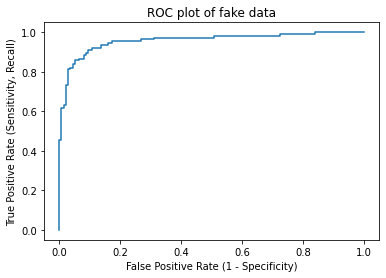

In [31]:
fpr, tpr, thr = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()

In [33]:
df = pd.read_csv('loanf.csv')
y_rate = (df['Interest.Rate'] <= 12).values
X_rate = df[['FICO.Score', 'Loan.Length', 'Loan.Amount']].values

In [34]:
X_rate,y_rate

(array([[  670,    36,  6000],
        [  670,    36,  2000],
        [  665,    36, 10625],
        ...,
        [  810,    36, 27000],
        [  765,    36, 25000],
        [  740,    60, 16000]], dtype=int64),
 array([False, False, False, ...,  True,  True, False]))

In [35]:
X_train_rate, X_test_rate, y_train_rate, y_test_rate = train_test_split(X_rate,y_rate)

In [36]:
lr_rate = LogisticRegression(max_iter=1000)
lr_rate.fit(X_train_rate,y_train_rate)

LogisticRegression(max_iter=1000)

In [37]:
y_pred_rate = lr_rate.predict_proba(X_test_rate)[:, 1]

In [38]:
y_pred_rate

array([0.35633195, 0.57722464, 0.14559541, 0.5432281 , 0.60950731,
       0.44270531, 0.63986966, 0.46533144, 0.45426887, 0.47857872,
       0.59115553, 0.50192268, 0.63249636, 0.43329994, 0.53003907,
       0.08281812, 0.52050162, 0.50989147, 0.46851317, 0.54428774,
       0.5310933 , 0.05541983, 0.50457283, 0.05861488, 0.57827603,
       0.46059099, 0.54902239, 0.47380371, 0.08967902, 0.54323957,
       0.53213767, 0.39822933, 0.44323227, 0.36762199, 0.5495511 ,
       0.47486871, 0.46112162, 0.33330132, 0.65680904, 0.39974628,
       0.5432281 , 0.50829029, 0.53583856, 0.49183792, 0.42237848,
       0.56630063, 0.04066853, 0.48918765, 0.56527023, 0.07795303,
       0.53003715, 0.47486871, 0.48520284, 0.09987758, 0.35878481,
       0.41153241, 0.42237848, 0.5324059 , 0.517322  , 0.42601109,
       0.32301139, 0.51996859, 0.08985351, 0.10199573, 0.56839373,
       0.05334529, 0.28442246, 0.53637925, 0.07524919, 0.54850309,
       0.0647596 , 0.04603465, 0.60087892, 0.53532651, 0.53109

In [40]:
fpr_rate,tpr_rate,thr_rate= roc_curve(y_test_rate,y_pred_rate)

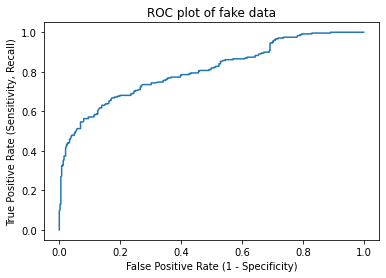

In [42]:
plt.plot(fpr_rate, tpr_rate)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of fake data")
plt.show()